In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


Description of columns
- MPG:Milege of the car (Mile per Gallon)
- HP:HOrse Power of the car(X1 column)
- VOL:Volume of the car (size)(X2 column)
- SP:TOP speed of the car (Miles per Hour)(X3 column)
- WT:Weight of the car (pounds)(X4 column)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

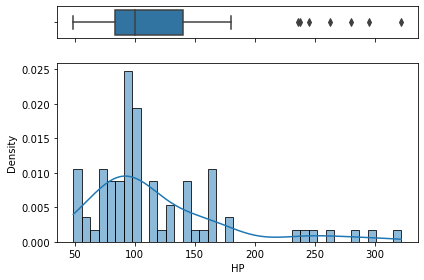

In [5]:
fig, (ax_box,ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios": (.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel=' ')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=39,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

In [6]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


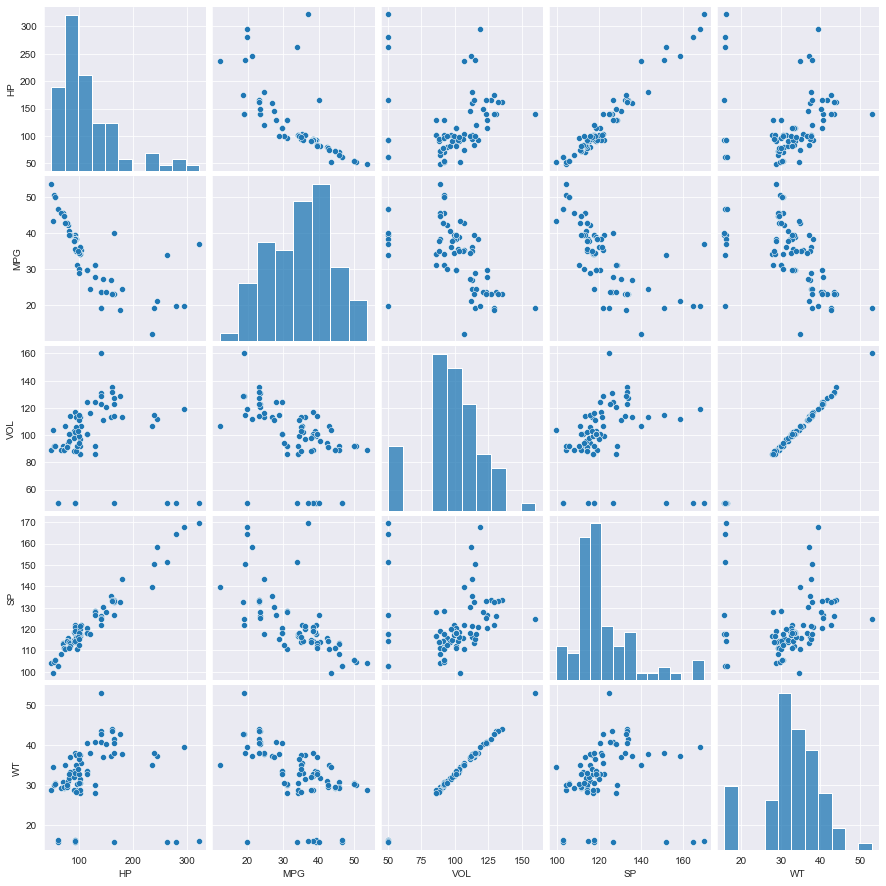

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### Observstion
- The height correlation is between vol and sp is 0.999203

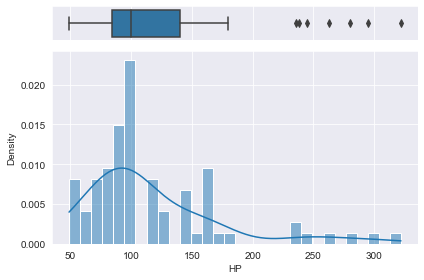

In [15]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()


###observations from boxplot and histograms
- there are some extreme values observed in towards the right tail of sp and hp distributions
- in vol and wt columns, a few outliers are observed in both tails of their distribution
- the extreme values of cars data may have come from the specially designed nature f cars

In [16]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


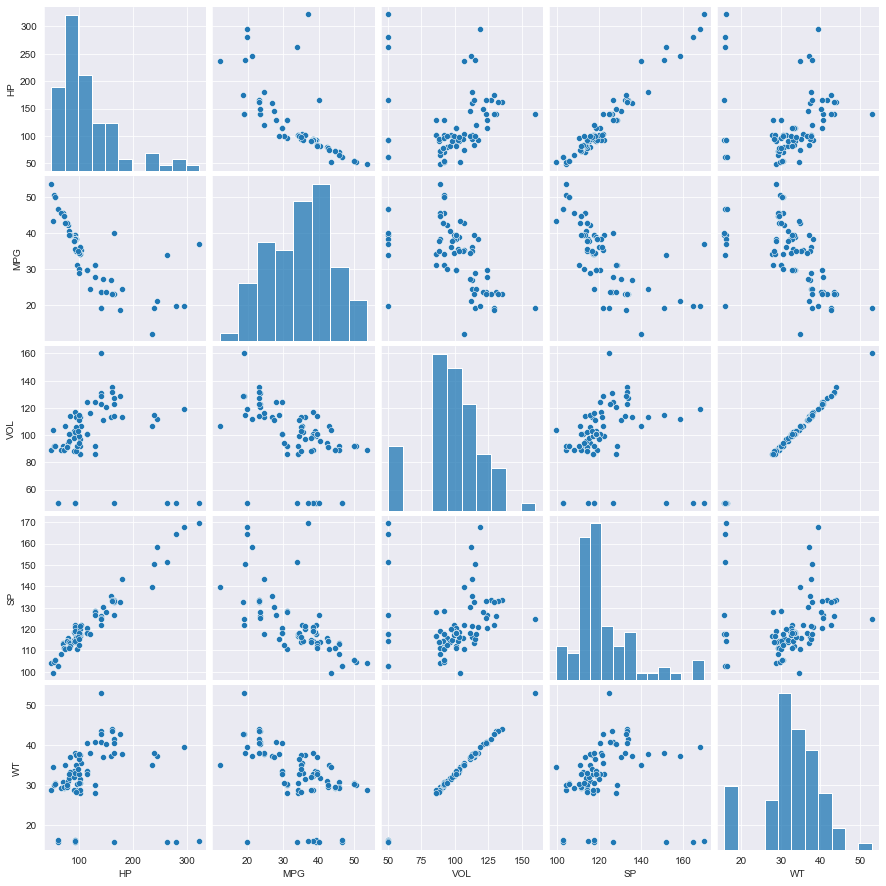

In [17]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [18]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


###observations from correlation plots and _coeffcients -Between x and y all the x variables are showing to high correlation strengths,highest being between hp and mpg -Therefore this dataset qualifies for building a multiple linear regression model to predict mpg

the high correlation among x columns is not desirable as it might lead to multicollinearity problem

In [23]:
model = smf.ols('MPG~WT+VOL+SP+Hp',data=cars).fit

PatsyError: Error evaluating factor: NameError: name 'Hp' is not defined
    MPG~WT+VOL+SP+Hp
                  ^^

In [24]:
model.summary()

NameError: name 'model' is not defined